# Tanmoy


## Preprocessed Data

In [1]:
#!/bin/env python3.7

# load custom modules required for CLR training
from modules.TransformerEncoder import Transformer
from modules.ContrastiveLosses import clr_loss,anomclr_loss,anomclr_plus_loss
from modules.EventLevelAnomalyAugmentations import rotate_events ,collinear_fill_jets

from modules.my_jet_augs import rotate_jets, distort_jets, rescale_pts, crop_jets, translate_jets, collinear_fill_jets, collinear_fill_jets_fast , shift_pT ,pt_reweight_jet, drop_constits_jet



# import args from extargs.py file
import My_Anom_extargs as args



# load standard python modules
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import time
import pandas as pd
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.nn.functional as F
from sklearn.metrics import roc_curve, auc

# load torch modules
import torch
import torch.nn as nn
import torch.nn.functional as F

#starting counter
t0 = time.time()

# initialise logfile
logfile = open("/remote/gpu05/rueschkamp/outputs_from_queue/AnomCLR/Debugging/my_debug_logfile.txt", "a" )
print( "logfile initialised"   )

# set gpu device
device = torch.device( "cuda" if torch.cuda.is_available() else "cpu" )
print( "device: " + str( device )    )

#loading in data ------------------------------------------------------------

sys.path.insert(1, '/remote/gpu05/rueschkamp/projects/torch_datasets/')
from top_dataset import My_Dataset
from semi_dataset import SemiV_Dataset
from torch.utils.data import DataLoader


#starting training loader --------------------------------------
n_jets = 1e5
ratio = 0.2

training_set = SemiV_Dataset(
                                    data_path =args.data_path,
                                    signal_origin= "qcd",
                                    usage= "training",
                                    number_constit=  args.n_constit,
                                    number_of_jets= n_jets,
                                    ratio = ratio
                                    )

dl_training = DataLoader(training_set,batch_size=args.batch_size, shuffle=True)

t1 = time.time()
print( "time taken to load and preprocess data: "+str( np.round( t1-t0, 2 ) ) + " seconds"    )


#initializing the network 
input_dim = 3 

net = Transformer( input_dim, args.model_dim, args.output_dim, args.n_heads, args.dim_feedforward, args.n_layers, args.learning_rate, args.n_head_layers, dropout=0.1, opt=args.opt )
# send network to device
net.to( device );

logfile initialised
device: cuda


In [ ]:
qcd_100k = []

for batch_idx, (data, labels) in enumerate(dl_training):
    qcd_100k.append(data)
    
    if batch_idx == len(dl_training) - 1:
        break

qcd_100k = torch.cat(qcd_100k, dim=0)


In [ ]:
print( len(qcd_100k))
np.save( "/remote/gpu05/rueschkamp/Safes/DoubleCheckData/qcd_100k.npy",qcd_100k.to(torch.device("cpu")).numpy())


In [ ]:
training_set = SemiV_Dataset(
                                    data_path =args.data_path,
                                    signal_origin= "aachen",
                                    usage= "training",
                                    number_constit=  args.n_constit,
                                    number_of_jets= 20000,
                                    ratio = ratio
                                    )

dl_training = DataLoader(training_set,batch_size=args.batch_size, shuffle=True)

aachen_20k = []

for batch_idx, (data, labels) in enumerate(dl_training):
    aachen_20k.append(data)
    
    if batch_idx == len(dl_training) - 1:
        break

aachen_20k = torch.cat(aachen_20k, dim=0)
print( len(aachen_20k))
np.save( "/remote/gpu05/rueschkamp/Safes/DoubleCheckData/aachen_20k.npy",aachen_20k.to(torch.device("cpu")).numpy())

In [ ]:
training_set = SemiV_Dataset(
                                    data_path =args.data_path,
                                    signal_origin= "heidelberg",
                                    usage= "training",
                                    number_constit=  args.n_constit,
                                    number_of_jets= 20000,
                                    ratio = ratio
                                    )

dl_training = DataLoader(training_set,batch_size=args.batch_size, shuffle=True)

heidelberg_20k = []

for batch_idx, (data, labels) in enumerate(dl_training):
    heidelberg_20k.append(data)
    
    if batch_idx == len(dl_training) - 1:
        break

heidelberg_20k = torch.cat(heidelberg_20k, dim=0)
print( len(heidelberg_20k))
np.save( "/remote/gpu05/rueschkamp/Safes/DoubleCheckData/heidelberg_20k.npy",heidelberg_20k.to(torch.device("cpu")).numpy())

# Lenni 

## Sheet 3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#define Chi
def Chi(rho,L):
    return 0.5*(1/(L*rho)+1/(1-rho))

# Generate a range of rho values
rho_vals = np.linspace(0.001, 1.999, 1000)

L = [1,2,5,10,20]

for i in range(5):
# Calculate the corresponding chi values for each rho value

    chi_vals = []
    for rho in rho_vals:
        # Use the second derivative of the free energy to calculate chi
        chi = Chi(rho, L[i])
        chi_vals.append(chi)

    # Plot the spinodal curve
    plt.plot(rho_vals, chi_vals, label=f'L = {L[i]}')

# Add axis labels and legend
plt.xlabel('Volume Fraction, ρ')
plt.ylabel(f'Flory-Huggins Parameter, χ = $0.5*(1/(L*ρ)+1/(1-ρ))$')
plt.legend()
plt.ylim(-10,10)

# Show the plot
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#define Chi
def Chi(rho,L):
    return 0.5*((L*rho)**(-1)+(1-rho)**(-1))

# Generate a range of rho values
rho_vals = np.linspace(0.001, 0.999, 1000)

L = [1+ 1e-3,1+ 1e-4,1+ 1e-5]

for i in range(3):
# Calculate the corresponding chi values for each rho value

    chi_vals = []
    for rho in rho_vals:
        # Use the second derivative of the free energy to calculate chi
        chi = Chi(rho, L[i])
        chi_vals.append(chi)

    # Plot the spinodal curve
    plt.plot(rho_vals, chi_vals, label=f'L = {L[i]}')

# Add axis labels and legend
plt.xlabel('Volume Fraction, ρ')
plt.ylabel('Flory-Huggins Parameter, χ')
plt.legend()

# Show the plot
plt.show()


## Sheet 6

In [5]:
import numpy as np

def G(n, N=10, a=1):
    return (n - a * np.sqrt(np.pi * n * (N - n) / N))

print(G(1))


-0.6814973649193785


/remote/gpu07a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


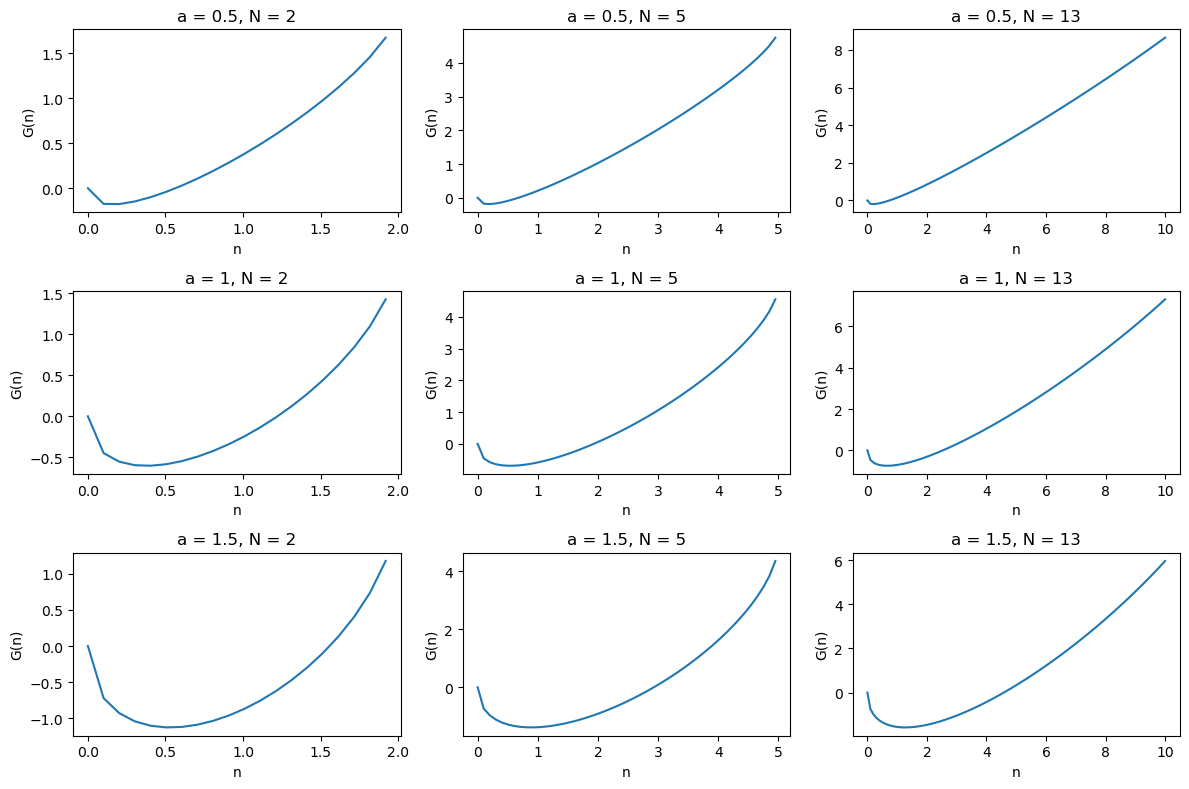

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def G(n, N=10, a=1):
    return n - a * np.sqrt(np.pi * n * (N - n) / N)


N=10
# Define the values of n
n_values = np.linspace(0, N, 100)  # Adjust the range as per your requirement

# Define the values of a and N
a_values = [0.5, 1, 1.5]  # Example values for a
N_values = [int(/4), int(N/2), int(N*3/4)]  # Example values for N

# Create subplots for different combinations of a and N
fig, axes = plt.subplots(len(a_values), len(N_values), figsize=(12, 8))

# Iterate over each combination of a and N and plot the function
for i, a in enumerate(a_values):
    for j, N in enumerate(N_values):
        ax = axes[i, j]
        ax.plot(n_values, G(n_values, N, a))
        ax.set_title(f"a = {a}, N = {N}")
        ax.set_xlabel('n')
        ax.set_ylabel('G(n)')

plt.tight_layout()
plt.show()


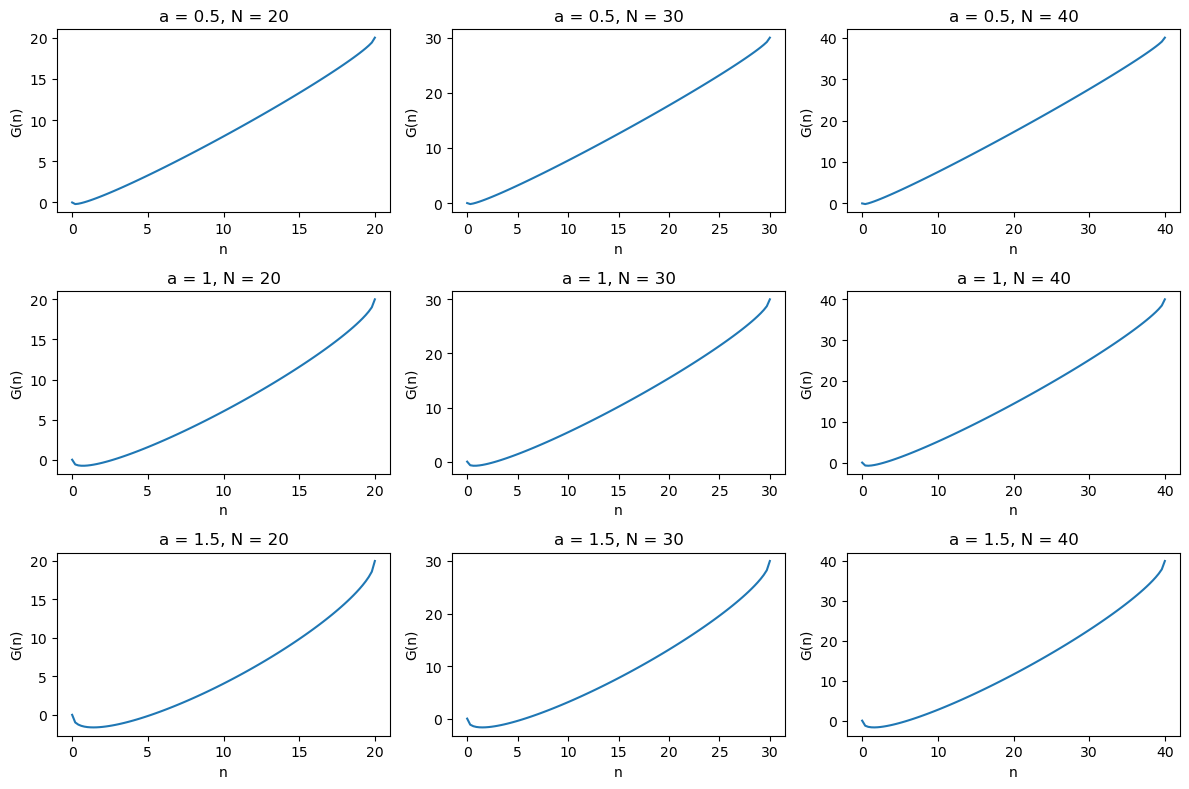

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def G(n, N=10, a=1):
    return n - a * np.sqrt(np.pi * n * (N - n) / N)

# Define the values of n
n_values = np.linspace(0, 10, 100)  # Adjust the range as per your requirement

# Define the values of a and N
a_values = [0.5, 1, 1.5]  # Example values for a
N_values = [20, 30, 40]  # Example values for N

# Create subplots for different combinations of a and N
fig, axes = plt.subplots(len(a_values), len(N_values), figsize=(12, 8))

# Iterate over each combination of a and N and plot the function
for i, a in enumerate(a_values):
    for j, N in enumerate(N_values):
        ax = axes[i, j]
        if N > 10:
            n_values = np.linspace(0, N, 100)  # Adjust the range based on N
        ax.plot(n_values, G(n_values, N, a))
        ax.set_title(f"a = {a}, N = {N}")
        ax.set_xlabel('n')
        ax.set_ylabel('G(n)')

plt.tight_layout()
plt.show()


# Ich

In [ ]:
#!/bin/env python3.7

# load custom modules required for CLR training
from modules.TransformerEncoder import Transformer
from modules.ContrastiveLosses import clr_loss,anomclr_loss,anomclr_plus_loss
from modules.EventLevelAnomalyAugmentations import rotate_events ,collinear_fill_jets

from modules.my_jet_augs import rotate_jets, distort_jets, rescale_pts, crop_jets, translate_jets, collinear_fill_jets, collinear_fill_jets_fast , shift_pT ,pt_reweight_jet, drop_constits_jet



# import args from extargs.py file
import My_Anom_extargs as args



# load standard python modules
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import time
import pandas as pd
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.nn.functional as F
from sklearn.metrics import roc_curve, auc

# load torch modules
import torch
import torch.nn as nn
import torch.nn.functional as F

#starting counter
t0 = time.time()

# initialise logfile
logfile = open("/remote/gpu05/rueschkamp/outputs_from_queue/AnomCLR/Debugging/my_debug_logfile.txt", "a" )
print( "logfile initialised"   )

# set gpu device
device = torch.device( "cuda" if torch.cuda.is_available() else "cpu" )
print( "device: " + str( device )    )

#loading in data ------------------------------------------------------------

sys.path.insert(1, '/remote/gpu05/rueschkamp/projects/torch_datasets/')
from top_dataset import My_Dataset
from semi_dataset import SemiV_Dataset
from torch.utils.data import DataLoader


#starting training loader --------------------------------------
n_jets = 1e5
ratio = 0.2
n_constits = 50

training_set = SemiV_Dataset(
                                    data_path =args.data_path,
                                    signal_origin= "qcd",
                                    usage= "training",
                                    number_constit=  n_constits,#args.n_constit,
                                    number_of_jets= n_jets,
                                    ratio = ratio
                                    )

dl_training = DataLoader(training_set,batch_size=args.batch_size, shuffle=True)

t1 = time.time()
print( "time taken to load and preprocess data: "+str( np.round( t1-t0, 2 ) ) + " seconds"    )


#initializing the network 
input_dim = 3 

net = Transformer( input_dim, args.model_dim, args.output_dim, args.n_heads, args.dim_feedforward, args.n_layers, args.learning_rate, args.n_head_layers, dropout=0.1, opt=args.opt )
# send network to device
net.to( device );

In [ ]:
loading_model = True
if loading_model :
    # Create an instance of your model
    net = Transformer( input_dim, args.model_dim, args.output_dim, args.n_heads, args.dim_feedforward, args.n_layers, args.learning_rate, args.n_head_layers, dropout=0.1, opt=args.opt )

    # Load the saved state dictionary
    #state_dict = torch.load("/remote/gpu05/rueschkamp/outputs_from_queue/AnomCLR/Model_21epochs_1e+04Jets.pt")
    Transformer_filename = f"/remote/gpu05/rueschkamp/outputs_from_queue/AnomCLR/plus/experiments/withhighdrop/brokeModel.pt"
    #Transformer_filename = f"/remote/gpu05/rueschkamp/outputs_from_queue/AnomCLR/plus/Longrun/Model_{epochs}epochs_{n_jets:.0e}Jets.pt"
    state_dict = torch.load(Transformer_filename)
    # Load the state dictionary into the model
    net.load_state_dict(state_dict)
    net.to(device)
    net.eval()

In [ ]:
x_k = torch.load("/remote/gpu05/rueschkamp/outputs_from_queue/AnomCLR/plus/experiments/withhighdrop/problematic_Tensor.pt")
x_i = torch.load("/remote/gpu05/rueschkamp/outputs_from_queue/AnomCLR/plus/experiments/withhighdrop/origin_Tensor.pt")

z_k = net(torch.ones(128,),use_mask = args.mask, use_continuous_mask = args.cmask)

In [ ]:
print(x_i[0])

In [ ]:
non_zeros = []

x = x_k.transpose(1,2)
for j in range(x.size(0)):
    #print(x.size())

    non_zero_count = torch.nonzero(x[j,0,:]).size(0)
    non_zeros.append(non_zero_count)

print(np.min(non_zeros))
plt.hist(non_zeros, bins=20, edgecolor='black')

non_zeros = []

x = x_i.transpose(1,2)
for j in range(x.size(0)):
    #print(x.size())

    non_zero_count = torch.nonzero(x[j,0,:]).size(0)
    non_zeros.append(non_zero_count)

plt.hist(non_zeros, bins=20, edgecolor='black')
plt.xlabel('Non-zero Entries')
plt.ylabel('Frequency')
plt.title('Histogram of Non-zero Entries in Jets')
plt.show()

In [ ]:
print(net.transformer.layers[0])

In [ ]:
print(net.embedding.weight)

# Luigi

## Rescaling the Augmentations


### Loading necesarry stuff

In [1]:
#!/bin/env python3.7

# load custom modules required for CLR training
from modules.TransformerEncoder import Transformer
from modules.ContrastiveLosses import clr_loss,anomclr_loss,anomclr_plus_loss
from modules.EventLevelAnomalyAugmentations import rotate_events ,collinear_fill_jets

from modules.my_jet_augs import rotate_jets, distort_jets, rescale_pts, crop_jets, translate_jets, collinear_fill_jets, collinear_fill_jets_fast , shift_pT ,pt_reweight_jet, drop_constits_jet



# import args from extargs.py file
import My_Anom_extargs as args



# load standard python modules
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import time
import pandas as pd
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.nn.functional as F
from sklearn.metrics import roc_curve, auc

# load torch modules
import torch
import torch.nn as nn
import torch.nn.functional as F

#starting counter
t0 = time.time()

# initialise logfile
logfile = open("/remote/gpu05/rueschkamp/outputs_from_queue/AnomCLR/Debugging/my_debug_logfile.txt", "a" )
print( "logfile initialised"   )

# set gpu device
device = torch.device( "cuda" if torch.cuda.is_available() else "cpu" )
#device = torch.device("cpu")
print( "device: " + str( device )    )

#loading in data ------------------------------------------------------------

sys.path.insert(1, '/remote/gpu05/rueschkamp/projects/torch_datasets/')
from top_dataset import My_Dataset
from semi_dataset import SemiV_Dataset
from semi_dataset_pure import SemiV_Dataset_pure
from semi_dataset_LCT import SemiV_Dataset_LCT
from torch.utils.data import DataLoader


#starting training loader --------------------------------------
n_jets = 1e5
ratio = 0.2
n_constits = 50

t1 = time.time()
print( "time taken to load and preprocess data: "+str( np.round( t1-t0, 2 ) ) + " seconds"    )


#initializing the network 
input_dim = 3 

net = Transformer( input_dim, args.model_dim, args.output_dim, args.n_heads, args.dim_feedforward, args.n_layers, args.learning_rate, args.n_head_layers, dropout=0.1, opt=args.opt )
# send network to device
net.to( device );

logfile initialised
device: cuda
time taken to load and preprocess data: 0.0 seconds


In [2]:
loading_model = True
if loading_model :
    #Create an instance of your model
    net = Transformer( input_dim, args.model_dim, args.output_dim, args.n_heads, args.dim_feedforward, args.n_layers, args.learning_rate, args.n_head_layers, dropout=0.1, opt=args.opt )
    #Load the saved state dictionary
    epochs = 300
    n_jets = 1e5
    #state_dict = torch.load("/remote/gpu05/rueschkamp/outputs_from_queue/AnomCLR/Model_21epochs_1e+04Jets.pt")
    Transformer_filename = f"/remote/gpu05/rueschkamp/outputs_from_queue/AnomCLR/plus/experiments/RunDrop0.6allpos_checkrescaling/Model_{epochs}epochs_{n_jets:.0e}Jets.pt"
    #Transformer_filename = f"/remote/gpu05/rueschkamp/outputs_from_queue/AnomCLR/plus/Longrun/Model_{epochs}epochs_{n_jets:.0e}Jets.pt"
    state_dict = torch.load(Transformer_filename)
    #Load the state dictionary into the model
    net.load_state_dict(state_dict)
    net.to(device)
    net.eval()
print(net)

Transformer(
  (embedding): Linear(in_features=3, out_features=1000, bias=True)
  (transformer): TransformerEncoder(
    (layers): ModuleList(
      (0): TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=1000, out_features=1000, bias=True)
        )
        (linear1): Linear(in_features=1000, out_features=1000, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=1000, out_features=1000, bias=True)
        (norm1): LayerNorm((1000,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((1000,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
      (1): TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=1000, out_features=1000, bias=True)
        )
        (linear1): Linear(in_f

## Saving pure data

In [3]:
#starting training loader --------------------------------------
n_jets = 1e5
ratio = 0.2

training_set = SemiV_Dataset_pure(
                                    data_path =args.data_path,
                                    signal_origin= "qcd",
                                    usage= "training",
                                    number_constit=  args.n_constit,
                                    number_of_jets= n_jets,
                                    ratio = ratio
                                    )

dl_training = DataLoader(training_set,batch_size=args.batch_size, shuffle=True)


testing_set_aachen = SemiV_Dataset_pure(
                                    data_path =args.data_path,
                                    signal_origin= "aachen",
                                    usage= "training",
                                    number_constit= args.n_constit,
                                    number_of_jets= n_jets,
                                    ratio = ratio
                                    )

dl_AE_testing_aachen = DataLoader(testing_set_aachen,batch_size=args.batch_size, shuffle=False)

testing_set_heidelberg = SemiV_Dataset_pure(
                                    data_path =args.data_path,
                                    signal_origin= "heidelberg",
                                    usage= "training",
                                    number_constit= args.n_constit,
                                    number_of_jets= 10000,
                                    ratio = ratio
                                    )

dl_AE_testing_heidelberg = DataLoader(testing_set_heidelberg,batch_size=args.batch_size, shuffle=False)


print(f"Testing DataLoader Aachen length: {len(dl_AE_testing_aachen)}")
print(f"Testing DataLoader Heidelberg length: {len(dl_AE_testing_heidelberg)}")

Testing DataLoader Aachen length: 782
Testing DataLoader Heidelberg length: 79


In [4]:
representations_qcd = []
labels_qcd = []
representations_aachen = []
labels_aachen = []
representations_heidelberg = []
labels_heidelberg = []
representations_top = []
labels_top = []

for i, (data, labels) in enumerate(dl_training):
        net.optimizer.zero_grad()
        x_i = data.transpose(1,2)
        with torch.no_grad():
                net.eval()
                z_i  = net(x_i, use_mask=args.mask, use_continuous_mask=args.cmask) #dim: x_i = torch.Size([104, 50, 3]) and z_i = torch.Size([104, 1000])

                representations_qcd.append(z_i.cpu())
                labels_qcd.append(labels)
        print("qcd done")



for i, (data, labels) in enumerate(dl_AE_testing_aachen):
        net.optimizer.zero_grad()
        x_i = data.transpose(1,2)
        with torch.no_grad():
                net.eval()
                z_i  = net(x_i, use_mask=args.mask, use_continuous_mask=args.cmask) #dim: x_i = torch.Size([104, 50, 3]) and z_i = torch.Size([104, 1000])

                representations_aachen.append(z_i.cpu())
                labels_aachen.append(labels)
        print("aachen done")
        
for i, (data, labels) in enumerate(dl_AE_testing_heidelberg):
        net.optimizer.zero_grad()

        x_i = data.transpose(1,2)
        with torch.no_grad():
                net.eval()
                z_i  = net(x_i, use_mask=args.mask, use_continuous_mask=args.cmask) #dim: x_i = torch.Size([104, 50, 3]) and z_i = torch.Size([104, 1000])

                representations_heidelberg.append(z_i.cpu())
                labels_heidelberg.append(labels)
        print("heidelberg done")


qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
q

In [8]:
print((labels_aachen))

[tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.], device='cuda:0'), tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
    

In [9]:
representations_qcd_tensor = torch.cat(representations_qcd, dim=0)
labels_qcd_tensor = torch.cat(labels_qcd).cpu()
print(representations_qcd_tensor.size())
print(labels_qcd_tensor.size())

representations_aachen_tensor = torch.cat(representations_aachen, dim=0)
labels_aachen_tensor = torch.cat(labels_aachen)
print(representations_aachen_tensor.size())
print(labels_aachen_tensor.size())

representations_heidelberg_tensor = torch.cat(representations_heidelberg, dim=0)
labels_heidelberg_tensor = torch.cat(labels_heidelberg)
print(representations_heidelberg_tensor.size())
print(labels_heidelberg_tensor.size())

torch.Size([100000, 1000])
torch.Size([100000])
torch.Size([100000, 1000])
torch.Size([100000])
torch.Size([10000, 1000])
torch.Size([10000])


In [12]:
path_data_folder = "/remote/gpu05/rueschkamp/data/Jandata/Representations/"

name_of_transformer_used = "RunDrop0.3allpos_checkrescaling/"



torch.save(representations_qcd_tensor, "/remote/gpu05/rueschkamp/data/Jandata/Representations/after_rescaling_allpos0.6drop/qcd_representations.pt")
torch.save(labels_qcd_tensor, "/remote/gpu05/rueschkamp/data/Jandata/Representations/after_rescaling_allpos0.6drop/qcd_labels.pt")

torch.save(representations_aachen_tensor, "/remote/gpu05/rueschkamp/data/Jandata/Representations/after_rescaling_allpos0.6drop/aachen_representations.pt")
torch.save(labels_aachen_tensor, "/remote/gpu05/rueschkamp/data/Jandata/Representations/after_rescaling_allpos0.6drop/aachen_labels.pt")

torch.save(representations_heidelberg_tensor, "/remote/gpu05/rueschkamp/data/Jandata/Representations/after_rescaling_allpos0.6drop/heidelberg_representations.pt")
torch.save(labels_heidelberg_tensor, "/remote/gpu05/rueschkamp/data/Jandata/Representations/after_rescaling_allpos0.6drop/heidelberg_labels.pt")

## Original Code for saving Mixture

In [5]:
#starting training loader --------------------------------------
n_jets = 1e5
ratio = 0.2

training_set = SemiV_Dataset(
                                    data_path =args.data_path,
                                    signal_origin= "qcd",
                                    usage= "training",
                                    number_constit=  args.n_constit,
                                    number_of_jets= n_jets,
                                    ratio = ratio
                                    )

dl_training = DataLoader(training_set,batch_size=args.batch_size, shuffle=True)


testing_set_aachen = SemiV_Dataset(
                                    data_path =args.data_path,
                                    signal_origin= "aachen",
                                    usage= "testing",
                                    number_constit= args.n_constit,
                                    number_of_jets= n_jets/2,
                                    ratio = ratio
                                    )

dl_AE_testing_aachen = DataLoader(testing_set_aachen,batch_size=args.batch_size, shuffle=False)

testing_set_heidelberg = SemiV_Dataset(
                                    data_path =args.data_path,
                                    signal_origin= "heidelberg",
                                    usage= "testing",
                                    number_constit= args.n_constit,
                                    number_of_jets= 10000,
                                    ratio = ratio
                                    )

dl_AE_testing_heidelberg = DataLoader(testing_set_heidelberg,batch_size=args.batch_size, shuffle=False)

testing_set_top = My_Dataset("/remote/gpu05/rueschkamp/data/Jandata/Zendoo/train.h5",
                                  "/remote/gpu05/rueschkamp/data/Jandata/Zendoo/val.h5",
                                  "/remote/gpu05/rueschkamp/data/Jandata/Zendoo/test.h5",
                                  "testing",
                                  50,
                                  number_of_jets= n_jets*0.2)

dl_AE_testing_top = DataLoader(testing_set_top,batch_size=args.batch_size, shuffle=False)

print(f"Testing DataLoader Aachen length: {len(dl_AE_testing_aachen)}")
print(f"Testing DataLoader Heidelberg length: {len(dl_AE_testing_heidelberg)}")
print(f"Testing DataLoader Top length: {len(dl_AE_testing_top)}")

Testing DataLoader Aachen length: 157
Testing DataLoader Heidelberg length: 32
Testing DataLoader Top length: 157


In [4]:
#starting training loader --------------------------------------
n_jets = 1e5
ratio = 0.2

training_set_aachen = SemiV_Dataset_LCT(
                                    data_path =args.data_path,
                                    signal_origin= "aachen",
                                    usage= "training",
                                    number_constit= args.n_constit,
                                    number_of_jets= n_jets,
                                    ratio = ratio
                                    )

dl_AE_training_aachen = DataLoader(training_set_aachen,batch_size=args.batch_size, shuffle=True)

training_set_heidelberg = SemiV_Dataset_LCT(
                                    data_path =args.data_path,
                                    signal_origin= "heidelberg",
                                    usage= "training",
                                    number_constit= args.n_constit,
                                    number_of_jets= 10000,
                                    ratio = ratio
                                    )

dl_AE_training_heidelberg = DataLoader(training_set_heidelberg,batch_size=args.batch_size, shuffle=True)

print(f"Training DataLoader Aachen length: {len(dl_AE_training_aachen)}")
print(f"Training DataLoader Heidelberg length: {len(dl_AE_training_heidelberg)}")


tensor([1., 1., 1.,  ..., 1., 1., 1.], device='cuda:0')
tensor([1., 1., 1.,  ..., 1., 1., 1.], device='cuda:0')
Training DataLoader Aachen length: 1563
Training DataLoader Heidelberg length: 157


### Getting representations

In [ ]:
print(f"Testing DataLoader QCD length: {len(dl_training)}")

In [6]:
representations_qcd = []
labels_qcd = []
representations_aachen = []
labels_aachen = []
representations_heidelberg = []
labels_heidelberg = []
representations_top = []
labels_top = []

for i, (data, labels) in enumerate(dl_training):
        net.optimizer.zero_grad()
        x_i = data.transpose(1,2)
        with torch.no_grad():
                net.eval()
                z_i  = net(x_i, use_mask=args.mask, use_continuous_mask=args.cmask) #dim: x_i = torch.Size([104, 50, 3]) and z_i = torch.Size([104, 1000])

                representations_qcd.append(z_i.cpu())
                labels_qcd.append(labels)
        print("qcd done")



for i, (data, labels) in enumerate(dl_AE_testing_aachen):
        net.optimizer.zero_grad()
        x_i = data.transpose(1,2)
        with torch.no_grad():
                net.eval()
                z_i  = net(x_i, use_mask=args.mask, use_continuous_mask=args.cmask) #dim: x_i = torch.Size([104, 50, 3]) and z_i = torch.Size([104, 1000])

                representations_aachen.append(z_i.cpu())
                labels_aachen.append(labels)
        print("aachen done")
        
for i, (data, labels) in enumerate(dl_AE_testing_heidelberg):
        net.optimizer.zero_grad()

        x_i = data.transpose(1,2)
        with torch.no_grad():
                net.eval()
                z_i  = net(x_i, use_mask=args.mask, use_continuous_mask=args.cmask) #dim: x_i = torch.Size([104, 50, 3]) and z_i = torch.Size([104, 1000])

                representations_heidelberg.append(z_i.cpu())
                labels_heidelberg.append(labels)
        print("heidelberg done")

for i, (data, labels) in enumerate(dl_AE_testing_top):
        net.optimizer.zero_grad()

        x_i = data.transpose(1,2)
        with torch.no_grad():
                net.eval()
                z_i  = net(x_i, use_mask=args.mask, use_continuous_mask=args.cmask) #dim: x_i = torch.Size([104, 50, 3]) and z_i = torch.Size([104, 1000])

                representations_top.append(z_i.cpu())
                labels_top.append(labels)

        print("top done")


qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
qcd done
q

In [6]:

training_representations_aachen = []
training_labels_aachen = []
training_representations_heidelberg = []
training_labels_heidelberg = []


for i, (data, labels) in enumerate(dl_AE_training_aachen):
        net.optimizer.zero_grad()
        x_i = data.transpose(1,2)
        with torch.no_grad():
                net.eval()
                z_i  = net(x_i, use_mask=args.mask, use_continuous_mask=args.cmask) #dim: x_i = torch.Size([104, 50, 3]) and z_i = torch.Size([104, 1000])

                training_representations_aachen.append(z_i.cpu())
                training_labels_aachen.append(labels)
        print("aachen done")
        
for i, (data, labels) in enumerate(dl_AE_training_heidelberg):
        net.optimizer.zero_grad()

        x_i = data.transpose(1,2)
        with torch.no_grad():
                net.eval()
                z_i  = net(x_i, use_mask=args.mask, use_continuous_mask=args.cmask) #dim: x_i = torch.Size([104, 50, 3]) and z_i = torch.Size([104, 1000])

                training_representations_heidelberg.append(z_i.cpu())
                training_labels_heidelberg.append(labels)
        print("heidelberg done")


aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aachen done
aach

In [7]:
print((labels_aachen))

[tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0'), tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
    

In [7]:
representations_qcd_tensor = torch.cat(representations_qcd, dim=0)
labels_qcd_tensor = torch.cat(labels_qcd).cpu()
print(representations_qcd_tensor.size())
print(labels_qcd_tensor.size())

representations_aachen_tensor = torch.cat(representations_aachen, dim=0)
labels_aachen_tensor = torch.cat(labels_aachen)
print(representations_aachen_tensor.size())
print(labels_aachen_tensor.size())

representations_heidelberg_tensor = torch.cat(representations_heidelberg, dim=0)
labels_heidelberg_tensor = torch.cat(labels_heidelberg)
print(representations_heidelberg_tensor.size())
print(labels_heidelberg_tensor.size())

representations_top_tensor = torch.cat(representations_top, dim=0)
labels_top_tensor = torch.cat(labels_top)
print(representations_top_tensor.size())
print(labels_top_tensor.size())


print(torch.max(labels_heidelberg_tensor))

torch.Size([100000, 1000])
torch.Size([100000])
torch.Size([20000, 1000])
torch.Size([20000])
torch.Size([4000, 1000])
torch.Size([4000])
torch.Size([20000, 1000])
torch.Size([20000])
tensor(1., device='cuda:0')


In [11]:
print(np.min(training_labels_aachen),np.max(training_labels_aachen))

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [10]:

training_representations_aachen_tensor = torch.cat(training_representations_aachen, dim=0)
training_labels_aachen_tensor = torch.cat(training_labels_aachen)
print(training_representations_aachen_tensor.size())
print(training_labels_aachen_tensor.size())

training_representations_heidelberg_tensor = torch.cat(training_representations_heidelberg, dim=0)
training_labels_heidelberg_tensor = torch.cat(training_labels_heidelberg)
print(training_representations_heidelberg_tensor.size())
print(training_labels_heidelberg_tensor.size())
print(torch.min(training_labels_heidelberg_tensor),torch.max(training_labels_heidelberg_tensor))

torch.Size([200000, 1000])
torch.Size([200000])
torch.Size([20000, 1000])
torch.Size([20000])
tensor(0., device='cuda:0') tensor(1., device='cuda:0')


### Just saving Representations

In [8]:

torch.save(representations_qcd_tensor, "/remote/gpu05/rueschkamp/data/Jandata/Representations/after_rescaling_allpos0.3drop/qcd_representations.pt")
torch.save(labels_qcd_tensor, "/remote/gpu05/rueschkamp/data/Jandata/Representations/after_rescaling_allpos0.3drop/qcd_labels.pt")

torch.save(representations_aachen_tensor, "/remote/gpu05/rueschkamp/data/Jandata/Representations/after_rescaling_allpos0.3drop/aachen_representations.pt")
torch.save(labels_aachen_tensor, "/remote/gpu05/rueschkamp/data/Jandata/Representations/after_rescaling_allpos0.3drop/aachen_labels.pt")

torch.save(representations_heidelberg_tensor, "/remote/gpu05/rueschkamp/data/Jandata/Representations/after_rescaling_allpos0.3drop/heidelberg_representations.pt")
torch.save(labels_heidelberg_tensor, "/remote/gpu05/rueschkamp/data/Jandata/Representations/after_rescaling_allpos0.3drop/heidelberg_labels.pt")

torch.save(representations_top_tensor, "/remote/gpu05/rueschkamp/data/Jandata/Representations/after_rescaling_allpos0.3drop/top_representations.pt")
torch.save(labels_top_tensor, "/remote/gpu05/rueschkamp/data/Jandata/Representations/after_rescaling_allpos0.3drop/top_labels.pt")


### Normalizing and saving Representations

In [ ]:
def normalising_representation_tensor(tensor):
    mean = torch.mean(tensor,dim=0)
    std = torch.std(tensor,dim=0)
    # Normalize the data
    normalized_tensor = (tensor - mean.unsqueeze(0)) / std.unsqueeze(0)

    return normalized_tensor

representations_qcd_normalized_tensor = normalising_representation_tensor(representations_qcd_tensor)
torch.save(representations_qcd_normalized_tensor, "/remote/gpu05/rueschkamp/data/Jandata/Representations/representations_qcd_normalized_tensor.pt")
torch.save(labels_qcd_tensor, "/remote/gpu05/rueschkamp/data/Jandata/Representations/labels_qcd_normalized_tensor.pt")

representations_aachen_normalized_tensor = normalising_representation_tensor(representations_aachen_tensor)
torch.save(representations_aachen_normalized_tensor, "/remote/gpu05/rueschkamp/data/Jandata/Representations/representations_aachen_normalized_tensor.pt")
torch.save(labels_aachen_tensor, "/remote/gpu05/rueschkamp/data/Jandata/Representations/labels_aachen_normalized_tensor.pt")

representations_heidelberg_normalized_tensor = normalising_representation_tensor(representations_heidelberg_tensor)
torch.save(representations_heidelberg_normalized_tensor, "/remote/gpu05/rueschkamp/data/Jandata/Representations/representations_heidelberg_normalized_tensor.pt")
torch.save(labels_heidelberg_tensor, "/remote/gpu05/rueschkamp/data/Jandata/Representations/labels_heidelberg_normalized_tensor.pt")




representations_top_normalized_tensor = normalising_representation_tensor(representations_top_tensor)
torch.save(representations_top_normalized_tensor, "/remote/gpu05/rueschkamp/data/Jandata/Representations/representations_top_normalized_tensor.pt")
torch.save(labels_top_tensor, "/remote/gpu05/rueschkamp/data/Jandata/Representations/labels_top_normalized_tensor.pt")



print("mean",torch.mean(representations_qcd_normalized_tensor[:,0]))
print("std",torch.std(representations_qcd_normalized_tensor[:,0]))


In [6]:
def normalising_representation_tensor(tensor):
    mean = torch.mean(tensor,dim=0)
    std = torch.std(tensor,dim=0)
    # Normalize the data
    normalized_tensor = (tensor - mean.unsqueeze(0)) / std.unsqueeze(0)

    return normalized_tensor

training_representations_aachen_normalized_tensor = normalising_representation_tensor(training_representations_aachen_tensor)
torch.save(training_representations_aachen_normalized_tensor, "/remote/gpu05/rueschkamp/data/Jandata/Representations/training_representations_aachen_normalized_tensor.pt")
torch.save(training_labels_aachen_tensor, "/remote/gpu05/rueschkamp/data/Jandata/Representations/training_labels_aachen_normalized_tensor.pt")

training_representations_heidelberg_normalized_tensor = normalising_representation_tensor(training_representations_heidelberg_tensor)
torch.save(training_representations_heidelberg_normalized_tensor, "/remote/gpu05/rueschkamp/data/Jandata/Representations/training_representations_heidelberg_normalized_tensor.pt")
torch.save(training_labels_heidelberg_tensor, "/remote/gpu05/rueschkamp/data/Jandata/Representations/training_labels_heidelberg_normalized_tensor.pt")

## Load

In [ ]:
# Load representations_qcd_normalized_tensor

batch_size =128
representations_qcd_normalized_tensor = torch.load("/remote/gpu05/rueschkamp/data/Jandata/Representations/representations_qcd_normalized_tensor.pt").to(device)
labels_qcd_tensor = torch.load( "/remote/gpu05/rueschkamp/data/Jandata/Representations/labels_qcd_normalized_tensor.pt").to(device)

dataset_qcd = TensorDataset(representations_qcd_normalized_tensor,labels_qcd_tensor)
dl_training = DataLoader(dataset_qcd, batch_size=batch_size, shuffle=True)

# Load representations_aachen_normalized_tensor
representations_aachen_normalized_tensor = torch.load("/remote/gpu05/rueschkamp/data/Jandata/Representations/representations_aachen_normalized_tensor.pt").to(device)
labels_aachen_tensor= torch.load( "/remote/gpu05/rueschkamp/data/Jandata/Representations/labels_aachen_normalized_tensor.pt").to(device)

dataset_aachen = TensorDataset(representations_aachen_normalized_tensor,labels_aachen_tensor)
dl_AE_testing_aachen = DataLoader(dataset_aachen, batch_size=batch_size, shuffle=True)

# Load representations_heidelberg_normalized_tensor
representations_heidelberg_normalized_tensor = torch.load("/remote/gpu05/rueschkamp/data/Jandata/Representations/representations_heidelberg_normalized_tensor.pt").to(device)
labels_heidelberg_tensor = torch.load("/remote/gpu05/rueschkamp/data/Jandata/Representations/labels_heidelberg_normalized_tensor.pt").to(device)

dataset_heidelberg = TensorDataset(representations_heidelberg_normalized_tensor,labels_heidelberg_tensor)
dl_AE_testing_heidelberg = DataLoader(dataset_heidelberg, batch_size=batch_size, shuffle=True)

# Load representations_top_normalized_tensor
representations_top_normalized_tensor = torch.load("/remote/gpu05/rueschkamp/data/Jandata/Representations/representations_top_normalized_tensor.pt").to(device)
labels_top_tensor = torch.load( "/remote/gpu05/rueschkamp/data/Jandata/Representations/labels_top_normalized_tensor.pt").to(device)

dataset_top = TensorDataset(representations_top_normalized_tensor,labels_top_tensor)
dl_AE_testing_top = DataLoader(dataset_top, batch_size=batch_size, shuffle=True)



print(f"Testing DataLoader Aachen length: {len(dl_AE_testing_aachen)}", file=logfile, flush=True)
print(f"Testing DataLoader Heidelberg length: {len(dl_AE_testing_heidelberg)}", file=logfile, flush=True)
print(f"Testing DataLoader Top length: {len(dl_AE_testing_top)}", file=logfile, flush=True)

## Building AE on representation

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        
        # Encoder network
        self.encoder = nn.Sequential(
            nn.Linear(1000, 512),
            nn.ReLU(True),
            nn.Linear(512, 256),
            nn.ReLU(True),
            nn.Linear(256, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True),
            nn.Linear(64, 32),
            nn.ReLU(True),
            nn.Linear(32, 16),
            nn.ReLU(True),
            nn.Linear(16, 8)
        )
        
        # Decoder network
        self.decoder = nn.Sequential(
            nn.Linear(8, 16),
            nn.ReLU(True),
            nn.Linear(16, 32),
            nn.ReLU(True),
            nn.Linear(32, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True),
            nn.Linear(128, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, 1000),
            #nn.Tanh()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    
    def criterion(self,x):
        recreation = self.forward(x)
        MSELoss = torch.mean((recreation-x)**2,dim=1)
        return MSELoss

In [ ]:
def get_true_labels(data_loader):
    labels = []
    for batch in data_loader:
        _, batch_labels = batch
        labels.extend(batch_labels.to(torch.device("cpu")).numpy().tolist())
    return np.array(labels)

print(get_true_labels(dl_AE_testing_heidelberg).shape)

In [ ]:

def get_true_labels(data_loader):
    labels = []
    for batch in data_loader:
        _, batch_labels = batch
        labels.append(batch_labels.to(torch.device("cpu")).numpy().tolist())
    labels = np.concatenate(labels)
    
    return np.array(labels)

def calculate_errors(model, dataloader):
    errors = []

    model.eval()  # Set model to evaluation mode

    with torch.no_grad():  # Turn off gradients since we're only evaluating
        for inputs, label in dataloader:
            error_single = model.criterion(inputs)
            errors.append(error_single.to(torch.device("cpu")).numpy())

    errors = np.concatenate(errors)  # Concatenate the errors along a new axis

    return errors

def plottingROC(model,dataloader,Dataorigin,epoch):    

    output_net_top = calculate_errors(model, dataloader)
    labels_net_top = get_true_labels(dataloader)

    print("errors= ", output_net_top)
    print("labels= ",labels_net_top)

    fpr, tpr, thresholds = roc_curve(labels_net_top, output_net_top) #getting the data needed to plot the ROC curve
    roc_auc = auc(fpr, tpr) #getting the AUC
    # Plot the ROC curve
    fig, ax = plt.subplots(figsize=(8, 6))
    lw = 2
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([1e-4, 1.0])  # set the lower limit to 0.0001 for logarithmic y-axis
    plt.xscale('linear')     # set x-axis to linear scale
    #plt.yscale('log')        # set y-axis to logarithmic scale
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve '+ Dataorigin)
    plt.legend(loc="lower right")

    if Dataorigin== "aachen":
        AUC_aachen.append(roc_auc)
        plt.savefig(expt_dir+ f"/AUC_aachen_epoch:{epoch}.pdf",format="pdf")

    if Dataorigin== "heidelberg":
        AUC_heidelberg.append(roc_auc)
        plt.savefig(expt_dir+ f"/AUC_heidelberg_epoch:{epoch}.pdf",format="pdf")

    if Dataorigin== "top":
        AUC_top.append(roc_auc)
        plt.savefig(expt_dir+ f"/AUC_top_epoch:{epoch}.pdf",format="pdf")


In [ ]:
print(get_true_labels(dl_AE_testing_heidelberg).shape)

In [ ]:
point_on_sphere = representations_qcd_normalized_tensor[:1000]
print(point_on_sphere.size())

model = Autoencoder()
model.to(device)
loss = torch.mean(model.criterion(point_on_sphere))
single_loss = model.criterion_single(point_on_sphere)

dataset_qcd = TensorDataset(representations_qcd_normalized_tensor,labels_qcd_tensor)
dl_training = DataLoader(dataset_qcd, batch_size=batch_size, shuffle=True)

x = calculate_errors(model, dl_training)
y = get_true_labels(dl_training)

print(x)
print(y.max())

In [ ]:
dataset_qcd = TensorDataset(representations_qcd_normalized_tensor,labels_qcd_tensor)
dl_training = DataLoader(dataset_qcd, batch_size=batch_size, shuffle=True)

model = Autoencoder()
model.to(device)
learning_rate = 1e-5
model.optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate)


# Utilize a named tuple to keep track of scores at each epoch
losses = []

AUC_aachen = []
AUC_heidelberg =[]
AUC_top =[]


def train(epochs, model, model_loss,train_dataloader):

    for epoch in range(epochs):

        losses_e=[]

        if epoch%30 == 0 and epoch > 0:
            model.eval()
            plottingROC(model,dl_AE_testing_aachen,"aachen",epoch)
            plottingROC(model,dl_AE_testing_heidelberg,"heidelberg",epoch)
            plottingROC(model,dl_AE_testing_top,"top",epoch)
            model.train()
            plt.figure()
            x = np.linspace(0, epoch-1 , epoch)
            plt.plot(x, losses, label="loss")
            #plt.yscale("log")
            plt.legend()
            plt.show()

        for i, (inputs, labels) in enumerate(train_dataloader):
            model.optimizer.zero_grad()
            #preprocess
            point_on_sphere = inputs
            loss = torch.mean(model.criterion(point_on_sphere)).to(device)
            loss.backward()
            model.optimizer.step()

            losses_e.append( loss.detach().cpu().numpy() )

        loss_e = np.mean( np.array( losses_e ) )
        print(loss_e, file=logfile, flush=True )
        losses.append( loss_e )



        t = time.time()
        print(f"Epoch {epoch}: loss={loss_e:.4f} time taken{round(t1-t,2)}")
    


epochs = 101



train(model =model , epochs = epochs, model_loss =model_loss,train_dataloader=dl_training) #AE



# .